<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions. 

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

## Q1. How big is this dataset? 
Use pandas to find out the number of rows and columns.

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
marvel = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv")
print("rows " + str(len(marvel)))
print("columns " + str(len(marvel.columns)))

rows 16376
columns 13


## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

**Show the distribution of appearances of characters based on how their alignment. What can you infer from the data?**

Text(0.5, 1, 'Appearances of characters based on their alignments')

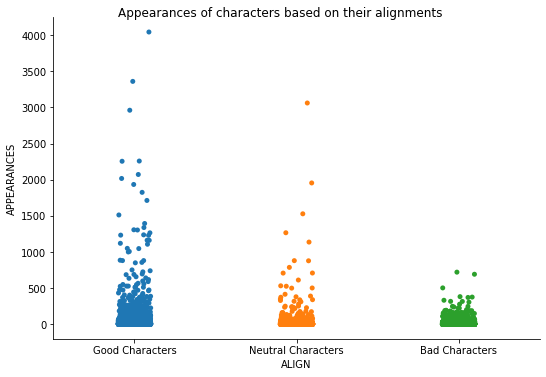

In [ ]:
stripplt = sns.catplot(data= marvel, x="ALIGN", y="APPEARANCES", aspect = 1.5)
stripplt.fig.suptitle("Appearances of characters based on their alignments", y = 1)

Amongst all the characters, it is the good characters who've made more appearances showing the marvel theme where heroes or good characters eventually defeat bad characters or evil men who most likely might've been eventually killed off or have been defeated.

## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

**Create a strip plot pointing out the relationship between Marvel characters appearance like eyes and hair to the appearsnces they've made in comics**

Text(0.5, 1, "Physical characteristics of characters and their relationship with the appearances they've made")

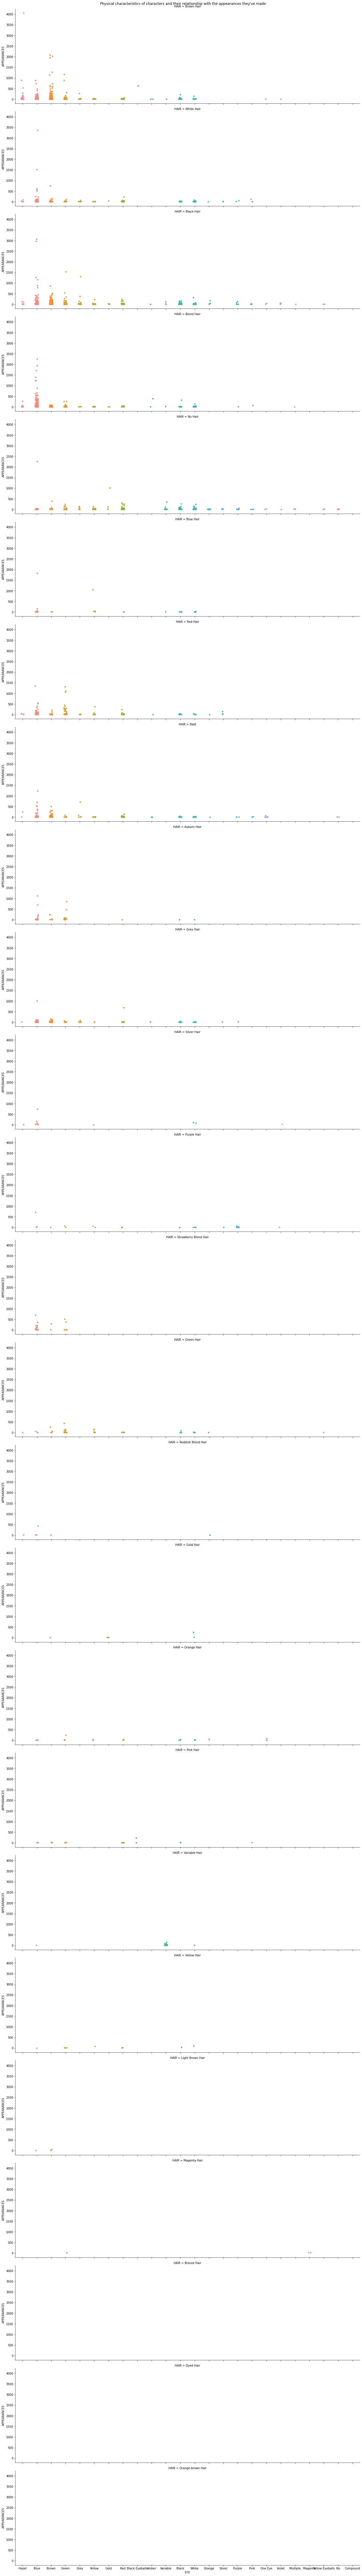

In [ ]:
marvel['EYE'] = marvel.EYE.str.replace(" Eyes","")
mstripplt = sns.catplot(data= marvel, x="EYE", y="APPEARANCES", row="HAIR", hue="EYE", aspect = 3.5)
mstripplt.fig.suptitle("Physical characteristics of characters and their relationship with the appearances they've made", y = 1)

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

**What does the identity of a good character from marvel say about their chances of living or dying? create a swarm plot to illustrate your point**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Living status of good characters based on their identities')

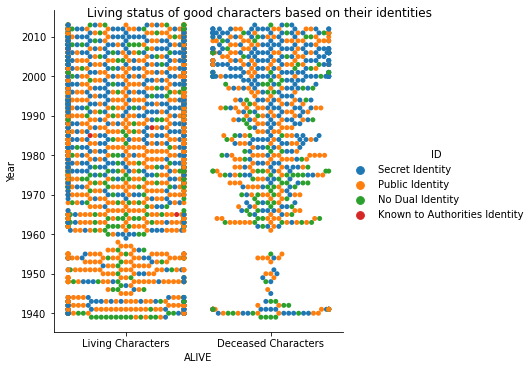

In [ ]:
marvel_good = marvel[marvel["ALIGN"] == "Good Characters"]
swarm = sns.catplot(data=marvel_good, x="ALIVE", y= "Year", hue="ID", kind= "swarm")
swarm.fig.suptitle("Living status of good characters based on their identities")

From the swarm plot, interesting readings can be found. Surprisingly it is characters with secret identites that have died rather than those with public identities. We'd expect good characters who hide their identities to have a higher chance of survival but that's not the case. 

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

Text(0.5, 0.98, 'Box plot for Living status of good characters based on their identities')

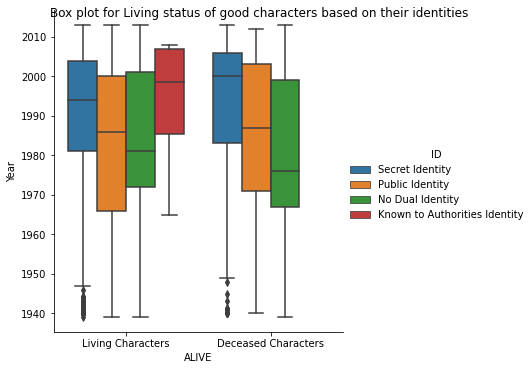

In [ ]:
box = sns.catplot(data=marvel_good, x="ALIVE", y= "Year", hue="ID", kind= "box")
box.fig.suptitle("Box plot for Living status of good characters based on their identities")

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

**Create a violin plot which defines a relationship between characters of a gender or sexual minority and year when they made their first appearance. What do you conclude from the strip plot?**

Text(0.5, 1, 'Inclusion of GSM characters over the years')

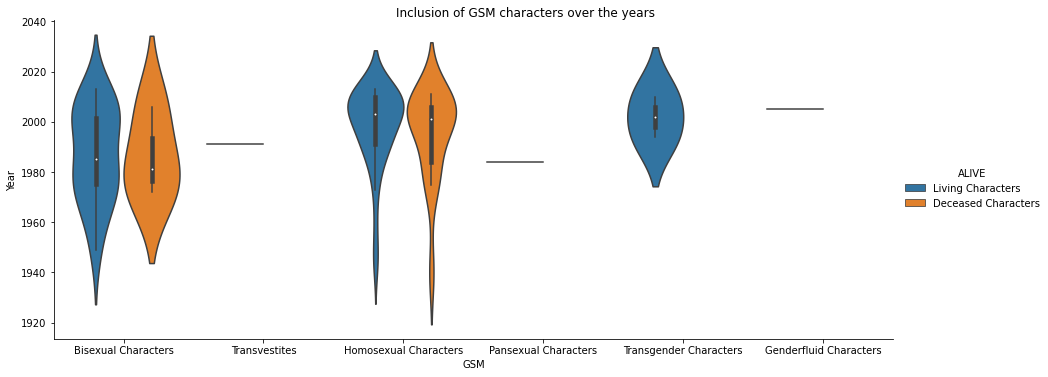

In [ ]:
stripplt = sns.catplot(data = marvel, x ="GSM", y = "Year", aspect = 2.5, kind= "violin", hue="ALIVE")
stripplt.fig.suptitle("Inclusion of GSM characters over the years", y = 1)

From the given strip plot, we can conclude that Marvel started including characters of GSM very late from the 1990s.

## Bonus: 
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories. 

In [ ]:
marvel


Text(0.5, 1, 'Inclusion of GSM characters over the years')

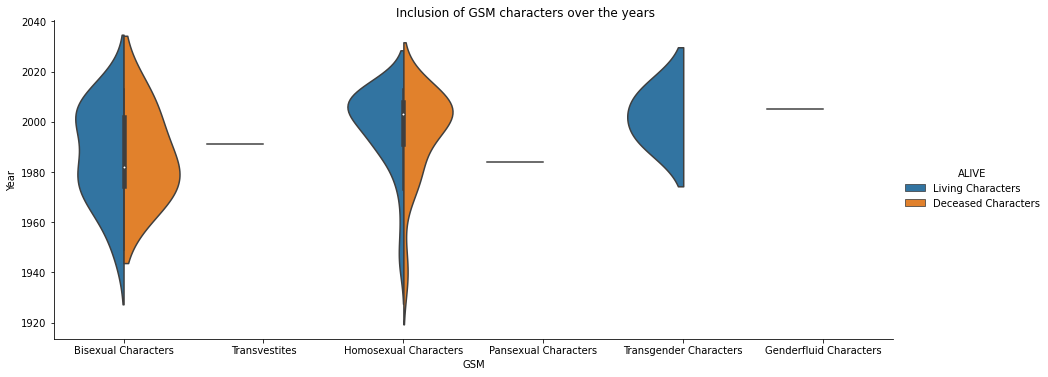

In [ ]:
stripplt1 = sns.catplot(data = marvel, x ="GSM", y = "Year", aspect = 2.5, kind= "violin",hue="ALIVE", split= True)
stripplt1.fig.suptitle("Inclusion of GSM characters over the years", y = 1)